In [49]:
# conda install conda-forge::scikit-fuzzy
# conda install conda-forge/label/cf201901::scikit-fuzzy
# conda install conda-forge/label/cf202003::scikit-fuzzy
# conda install conda-forge/label/gcc7::scikit-fuzzy
# pip install scikit-fuzzy

import skfuzzy as fuzz
from skfuzzy import control as ctrl

import matplotlib.pyplot as plt
import numpy as np

In [50]:
crises = ctrl.Antecedent(np.arange(0, 101, 1), "crises")
saba = ctrl.Antecedent(np.arange(0, 101, 1), "saba")
expiratoryRate = ctrl.Antecedent(np.arange(0, 101, 1), "expiratoryRate")
seriousness = ctrl.Consequent(np.arange(0, 101, 1), "seriousness")

In [51]:
crises.automf(names=["semanal", "diario", "continuo"])
saba.automf(names=["semanal", "diario", "continuo"])
expiratoryRate.automf(names=["50-80", "33-55", "menos_33"])
seriousness.automf(names=["moderada", "aguda_grave", "risco_vida"])

In [52]:
crises["semanal"] = fuzz.trapmf(crises.universe, [0, 0, 30, 50])
crises["diario"] = fuzz.trapmf(crises.universe, [30, 50, 70, 90])
crises["continuo"] = fuzz.trapmf(crises.universe, [80, 90, 100, 100])

In [53]:
saba["semanal"] = fuzz.trapmf(saba.universe, [0, 0, 20, 40])
saba["diario"] = fuzz.trapmf(saba.universe, [20, 40, 60, 80])
saba["continuo"] = fuzz.trapmf(saba.universe, [80, 90, 100, 100])

In [54]:
expiratoryRate["50-80"] = fuzz.trapmf(expiratoryRate.universe, [0, 0, 20, 40])
expiratoryRate["33-55"] = fuzz.trapmf(expiratoryRate.universe, [20, 40, 60, 80])
expiratoryRate["menos_33"] = fuzz.trapmf(expiratoryRate.universe, [80, 90, 100, 100])

In [55]:
seriousness["moderada"] = fuzz.trimf(seriousness.universe, [0, 30, 60])
seriousness["aguda_grave"] = fuzz.trimf(seriousness.universe, [30, 60, 85])
seriousness["risco_vida"] = fuzz.trimf(seriousness.universe, [90, 100, 100])

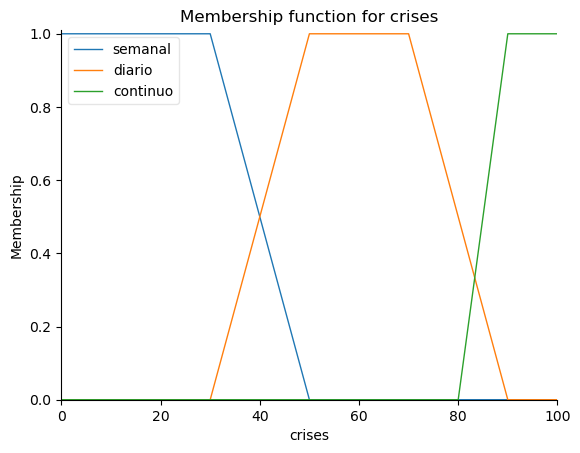

In [56]:
crises.view()
plt.title("Membership function for crises")
plt.show()

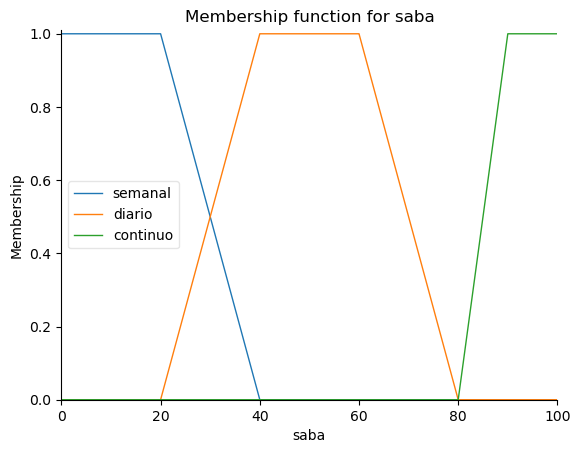

In [57]:
saba.view()
plt.title("Membership function for saba")
plt.show()

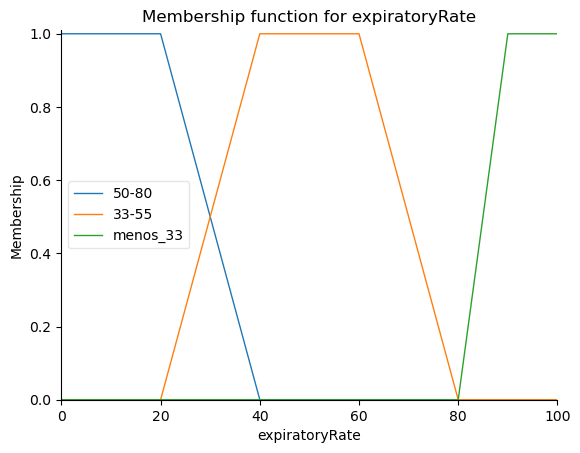

In [58]:
expiratoryRate.view()
plt.title("Membership function for expiratoryRate")
plt.show()

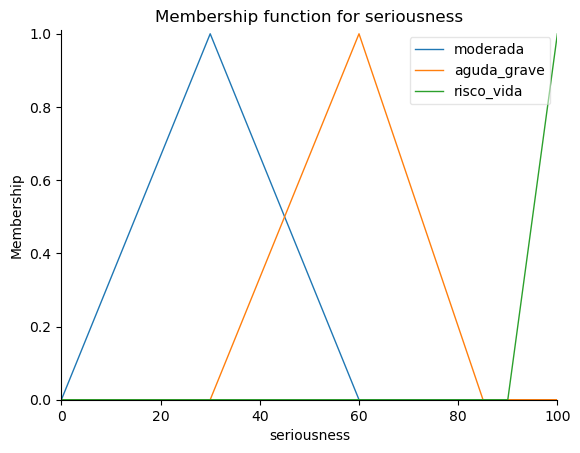

In [59]:
seriousness.view()
plt.title("Membership function for seriousness")
plt.show()

In [63]:
rules1 = ctrl.Rule(
    crises["semanal"] | saba["semanal"] | expiratoryRate["50-80"],
    seriousness["moderada"],
)
rules2 = ctrl.Rule(
    crises["diario"] | saba["diario"] | expiratoryRate["33-55"],
    seriousness["aguda_grave"],
)
rules3 = ctrl.Rule(
    crises["continuo"] | saba["continuo"] | expiratoryRate["menos_33"],
    seriousness["risco_vida"],
)

In [64]:
asthma_ctrl = ctrl.ControlSystem([rules1, rules2, rules3])

asthma = ctrl.ControlSystemSimulation(asthma_ctrl)

In [70]:
asthma.input["crises"] = 70
asthma.input["saba"] = 80
asthma.input["expiratoryRate"] = 90

asthma.compute()

result = asthma.output["seriousness"]

print("Seriousness:", result)

if result < 60:
    print("Moderada")
elif result < 90:
    print("Aguda Grave")
else:
    print("Risco de Vida")

Seriousness: 64.23076923076924
Aguda Grave
